# Study of the relations between the forecast pollen concentration and the level of risk 

The level of risk is tekkeb from https://www.pollens.fr/les-risques/risques-par-ville/29/9/2024

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
pollen_forecast = (
    xr.open_dataset("./grass_pollen_2023-03-01_2023-09-30.nc")
    .mean(["latitude", "longitude", "level"])
    .to_dataframe()
    .dropna()
)
pollen_forecast.index += pd.Timestamp("2023-03-01")
pollen_forecast = pollen_forecast.resample("D").max()

<Axes: xlabel='time'>

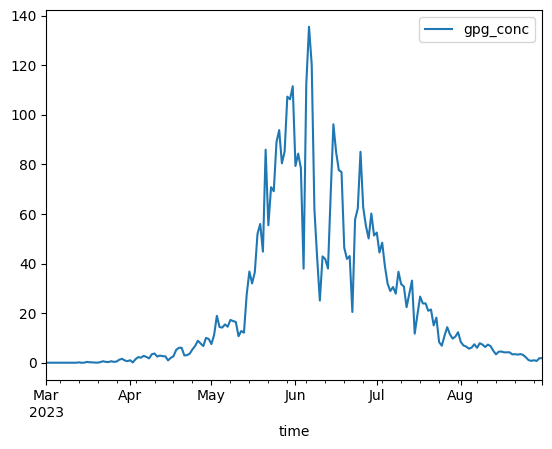

In [32]:
pollen_forecast.plot()

In [33]:
level = pd.read_csv(
    "./impact_graminees_2023.csv", sep=";", index_col=0, parse_dates=True
)
level

/tmp/ipykernel_321274/4114237107.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  level = pd.read_csv("./impact_graminees_2023.csv", sep=";", index_col=0, parse_dates=True)


,value
date,
2023-01-24,0.0
2023-01-25,0.0
2023-03-26,0.0
2023-03-27,1.2
2023-03-28,1.2
...,...
2023-11-01,0.0
2023-11-02,0.0
2023-11-03,0.0


In [34]:
df = pd.concat([pollen_forecast, level], axis=1).dropna()
df.head()

,gpg_conc,value
2023-03-26,0.337703,0.0
2023-03-27,0.477384,1.2
2023-03-28,1.214195,1.2
2023-03-29,1.578833,1.2
2023-03-30,0.933862,1.2


<Axes: xlabel='gpg_conc', ylabel='value'>

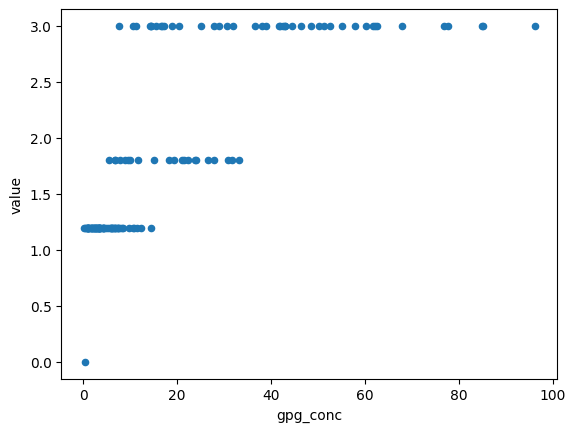

In [37]:
df.plot.scatter(x="gpg_conc", y="value")

In [39]:
import seaborn as sns

<Axes: xlabel='value', ylabel='gpg_conc'>

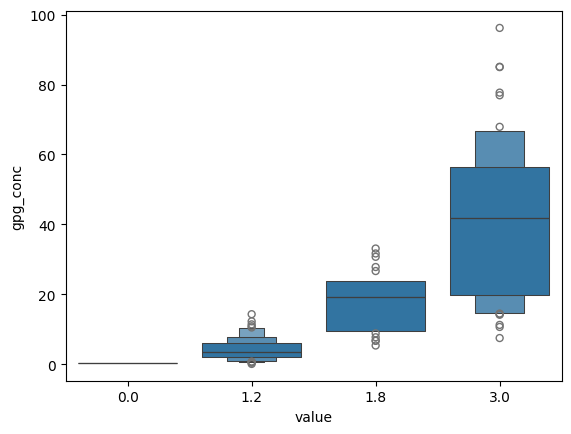

In [44]:
sns.boxenplot(data=df, x="value", y="gpg_conc")

# Conclusion

The forecast pollen concentration is a good indicator of the level of risk. The higher the concentration, the higher the risk.
However, the classification of the risk level is not direct with the concentration.
The classes overlap and the risk level is not a direct function of the concentration.

We coul train a model to predict the risk level from concentration features for each day (mean, max, etc.) but the model would not be very accurate.
Ideally, we need to know how the risk level is computed to build a model that predicts it.